# in this notebook, results of two experiments with the same seed on Håkan and Saeid's computer has been shown

## imports

In [1]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [2]:
from scr.RQ1_forecast import *

In [3]:
num_samples = 100

In [4]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/traffic/1A'

# metric section

In [5]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

101it [00:00, 28792.54it/s]
100%|#############| 99/99 [00:04<00:00, 23.29it/s]


In [6]:
# read the second results
metrics_list2 = read_csv_result('metrics.csv', data_address2)

101it [00:00, 31215.44it/s]
100%|###########| 100/100 [00:04<00:00, 24.70it/s]


In [7]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [8]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [9]:
sort_metric_list(metrics_list1)
sort_metric_list(metrics_list2)


In [10]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,201.236165,270.903564,235.0,9.791667,8.031874,1.405357,2.867487,0.752681,NaN,30.065092,251.480861,0.708333,270.903529,0.958333,88.063585,1.000000
1,321,0.0,115.575724,196.189148,264.0,11.000000,8.026991,1.018383,1.959425,0.691471,NaN,25.286467,155.523003,0.541667,196.189157,0.791667,114.747170,0.875000
2,642,0.0,163.393504,253.373138,284.0,11.833333,8.025109,1.315523,1.711095,0.723348,NaN,30.185729,208.674636,0.750000,253.373154,0.916667,118.474028,0.916667
3,963,0.0,122.346710,226.938919,189.0,7.875000,8.024132,1.178419,2.296112,0.849825,NaN,30.549057,260.155552,0.875000,226.938930,0.875000,60.929320,1.000000
4,1284,0.0,20.895597,73.803986,166.0,6.916667,8.019890,0.383442,0.708178,0.467564,NaN,9.809795,39.441866,0.250000,73.803988,0.416667,65.994525,0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,962,320.0,41859.359375,4328.768555,74254.0,3093.916667,287.494114,0.627371,0.060022,0.062306,NaN,4.459930,2003.600293,0.000000,4328.768799,0.041667,1190.268213,0.583333
2243,1283,320.0,131098.572917,8168.035156,78719.0,3279.958333,287.257349,1.184773,0.103887,0.110046,NaN,18.937011,2697.404932,0.000000,8168.035156,0.000000,5425.503662,0.166667
2244,1604,320.0,59728.197917,5092.566406,74298.0,3095.750000,287.146950,0.738961,0.066275,0.069216,NaN,8.732626,2078.027686,0.000000,5092.566406,0.083333,2552.043018,0.500000
2245,1925,320.0,34865.544271,4130.916016,68217.0,2842.375000,287.030085,0.599664,0.059352,0.061461,NaN,2.704289,1796.827295,0.000000,4130.915771,0.000000,675.019922,0.833333


In [11]:
metrics_exp_list = [metrics_list1, metrics_list2]

In [12]:
metrics_exp_np = get_metric_list_np(metrics_exp_list)
metrics_exp_np.shape

(2, 2247, 18)

In [13]:
metrics_exp_np.std(axis=0).shape

(2247, 18)

In [14]:
pd.DataFrame(metrics_exp_np.std(axis=0))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,7.621816,4.510239,0.0,0.0,0.0,0.023398,0.037434,0.005349,NaN,3.580279,29.469706,0.041667,4.510224,0.020833,0.561327,0.000000
1,0.0,0.0,15.342921,22.563965,0.0,0.0,0.0,0.117125,0.267139,0.047626,NaN,1.638195,24.131901,0.104167,22.563969,0.041667,3.877556,0.000000
2,0.0,0.0,17.600978,18.717453,0.0,0.0,0.0,0.097182,0.143704,0.032851,NaN,0.577056,10.005243,0.041667,18.717445,0.000000,0.882188,0.020833
3,0.0,0.0,32.269618,26.661339,0.0,0.0,0.0,0.138444,0.263085,0.040468,NaN,1.039504,6.884342,0.041667,26.661348,0.041667,11.304057,0.000000
4,0.0,0.0,1.040717,1.589451,0.0,0.0,0.0,0.008258,0.006801,0.004487,NaN,0.099583,0.266174,0.020833,1.589451,0.020833,2.129812,0.020833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,0.0,0.0,16191.875000,1300.574341,0.0,0.0,0.0,0.188493,0.018963,0.020228,NaN,1.345091,481.242432,0.000000,1300.574463,0.229167,105.409546,0.208333
2243,0.0,0.0,50188.283854,2430.705444,0.0,0.0,0.0,0.352574,0.031542,0.034000,NaN,7.329710,442.752563,0.000000,2430.705444,0.041667,2025.660962,0.333333
2244,0.0,0.0,21524.544271,1175.988403,0.0,0.0,0.0,0.170643,0.014865,0.016468,NaN,3.206070,455.130078,0.020833,1175.988403,0.250000,576.284521,0.229167
2245,0.0,0.0,14492.832682,1230.470825,0.0,0.0,0.0,0.178621,0.017100,0.018224,NaN,0.543239,372.122656,0.000000,1230.470703,0.270833,250.664429,0.083333


In [15]:
different_indexes_list = get_different_idx(metrics_list1, metrics_list2)

In [16]:
len(different_indexes_list)

100

# Forecast section

In [6]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

101it [00:00, 25498.06it/s]
100%|###########| 100/100 [08:03<00:00,  4.84s/it]


In [7]:
len(forcast_list1)

100

In [9]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [10]:
sorted_forcast_list1[0]

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2016-08-07 20:00:00,0.0393,0.040485,0.042979,0.042654,0.041472,0.041253,0.039513,...,0.044147,0.037549,0.043552,0.041992,0.034868,0.042852,0,0.040731,0.004881,0.105208
1,1,321,2016-08-07 20:00:00,0.0310,0.030655,0.031230,0.032282,0.029255,0.033063,0.029272,...,0.030736,0.029596,0.031111,0.032282,0.030750,0.030269,0,0.030209,0.001625,0.136953
2,1,642,2016-08-07 20:00:00,0.0471,0.049798,0.050496,0.050789,0.044720,0.048073,0.034183,...,0.046641,0.049411,0.048202,0.046436,0.048426,0.036609,0,0.047901,0.004543,0.157920
3,1,0,2016-08-07 21:00:00,0.0187,0.024300,0.031618,0.029440,0.027838,0.029763,0.027973,...,0.027550,0.026036,0.031420,0.027915,0.025080,0.031216,0,0.029303,0.005588,0.096130
4,1,321,2016-08-07 21:00:00,0.0241,0.024318,0.024698,0.026242,0.025382,0.027615,0.024149,...,0.025098,0.026378,0.020888,0.028369,0.025074,0.026742,0,0.024796,0.002424,0.113530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144811,1,5777,2016-08-14 17:00:00,0.0554,0.049221,0.053822,0.047541,0.045803,0.051130,0.047316,...,0.047934,0.047876,0.050288,0.047390,0.050109,0.043135,320,0.046416,0.009417,0.123936
144812,1,5456,2016-08-14 18:00:00,0.0417,0.045593,0.041676,0.043625,0.040393,0.043151,0.042634,...,0.040751,0.046576,0.048974,0.038728,0.037804,0.042496,320,0.041266,0.006405,0.145028
144813,1,5777,2016-08-14 18:00:00,0.0591,0.047673,0.048443,0.045737,0.046016,0.048390,0.052567,...,0.052943,0.046414,0.047133,0.044616,0.045783,0.045246,320,0.044966,0.007277,0.112804
144814,1,5456,2016-08-14 19:00:00,0.0381,0.046589,0.045142,0.043658,0.047950,0.046403,0.045840,...,0.045810,0.040543,0.049460,0.045128,0.042490,0.044076,320,0.045104,0.006199,0.113975


In [11]:
target_forcast_series = get_forcast_target(forcast_list1)

In [12]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

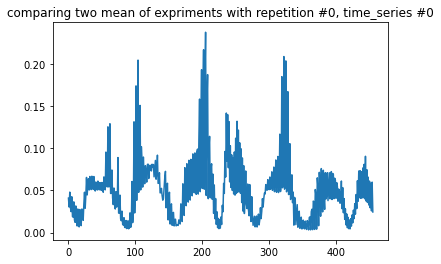

In [14]:
# plot mean of only one time series
rep_no = 0
plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [38]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[37]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[60]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[9]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[22]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [39]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.6673571980996575
percentage of underprediction of best repetition for experiment A = 0.7584659153684675
percentage of underprediction of highest repetition for experiment A = 0.16298613412882554
percentage of underprediction of lowest repetition for experiment A = 0.8781833499060877


(0.04, 0.24)

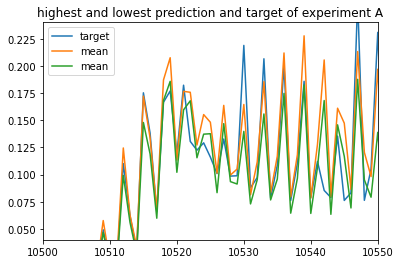

In [37]:
plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[9]['mean'].plot(legend=True)
sorted_forcast_list1[22]['mean'].plot(legend=True)
plt.xlim([10500,10550])
plt.ylim([0.04,0.24])

In [19]:
# find the one with the highest prediction
# get_highest_prediction_id(sorted_forcast_list1, high_flag=True)
get_highest_prediction_id(sorted_forcast_list1, high_flag=False)

22

In [27]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [28]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (9, 19)


## find the tuples for all the time series (it takes much time)

In [119]:
# get all the 321 pairs here
lower_pair_list = []
higher_pair_list = []

for i in range(321):
    # lower values
    higher_flag = False
    idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    lower_pair_list.append(idx_dif)
    break
    # higher values
    # higher_flag = True
    # idx_dif, mx_dif, l_list = get_max_diff_id(i, sorted_forcast_list1, sorted_forcast_list2, higher_flag)
    # higher_pair_list.append(idx_dif)


In [ ]:
# calculating the most appeared pairs
import statistics 
from statistics import mode 

mode(lower_pair_list), mode(higher_pair_list)

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

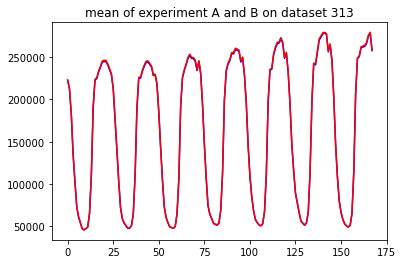

In [124]:
ts_no = 313

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
for idx, ts_df2 in enumerate(ts_list2):
    means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
mean_means_B = means_B.mean(axis=0)

plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue')
plt.plot(mean_means_B, color='red')
# plt.plot(ts_list1[0]['target'].to_numpy())
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

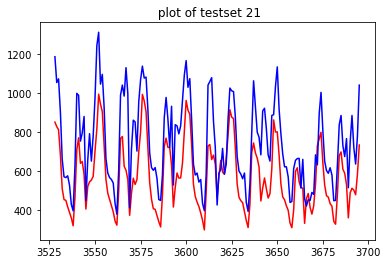

In [118]:
ts_no = 21
# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)

plt.title(f' plot of testset {ts_no}')
ts_list2[63]['mean'].plot(color='r')
# ts_list2[50]['mean'].plot(color='g')
ts_list2[63]['target'].plot(color='b')


In [129]:
# point to point check
compare_list = []
# for rep_no in range(len(sorted_forcast_list1)):
#     sorted_forcast_list1[rep_no]
#     sorted_forcast_list2[rep_no]
rep_no = 0
res = sorted_forcast_list1[rep_no].loc[:,'sample0':'sample99'] == sorted_forcast_list2[rep_no+1].loc[:,'sample0':'sample99'] 
conc = pd.value_counts(res.values.flatten())
conc

False    5392800
dtype: int64

In [240]:
# using ks for one time series
from scipy import stats
np.random.seed(12345678)


In [284]:
# input is two forcast list and outputs a numpy array correspond to p value of test set
#this test set is between same repetition of different experiments in all the time points
def get_ks_test_np(forcasct_list_val1, forcasct_list_val2):
    rep_no = 0
    indexs = forcasct_list_val1[rep_no].loc[:,'sample0':'sample99'].index

    # numpy array to store the results
    result = np.zeros((len(forcasct_list_val1), forcasct_list_val1[0].shape[0]))
                  
    for rep_no in range(len(forcasct_list_val1)):
        for time_point in range(forcasct_list_val1[0].shape[0]):
            result[rep_no, time_point] = stats.ks_2samp(forcasct_list_val1[rep_no].loc[indexs[time_point],'sample0':'sample99'].values,
                                                        forcasct_list_val2[rep_no].loc[indexs[time_point],'sample0':'sample99'].values).pvalue
    return result

In [285]:
# get the ks test for our time series
res = get_ks_test_np(ts_list1, ts_list2)
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [286]:
# get the ks test for our sample forcast list
res = get_ks_test_np(sorted_forcast_list1, sorted_forcast_list2)
pd.DataFrame(res)

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [38]:
# get the sample comlumn
sample_forcast_list1 = get_forcast_samples(forcast_list1)
sample_forcast_list2 = get_forcast_samples(forcast_list2)

In [39]:
forcast_param1 = get_forcast_distrib(forcast_list1)
forcast_param2 = get_forcast_distrib(forcast_list2)

In [46]:
forcast_param1[0]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
mean,12.512512,20.143100,18.553237,19.515835,18.176119,17.823040,16.032652,16.878014,17.516852,16.548617,...,3123.133220,3249.715213,3312.733490,3258.632780,3338.587836,3458.911958,3498.596012,3506.911943,3381.088577,3228.993918
sigma,4.483272,8.943163,4.893311,3.252827,2.403508,2.452305,5.373599,3.186098,4.575024,3.517587,...,206.049341,276.372823,243.783388,233.293571,366.031723,273.041950,241.932707,263.102431,238.001527,229.811579


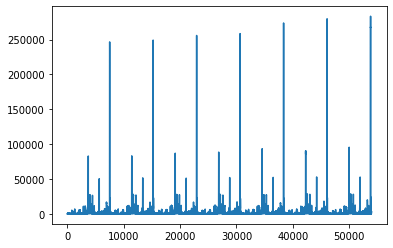

In [51]:
# plot both means 
rep_id = 0
forcast_param2[rep_id].loc['mean'].plot()
# forcast_param1[rep_id].T.plot()

In [41]:
forcast_param1[0]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
mean,12.512512,20.143100,18.553237,19.515835,18.176119,17.823040,16.032652,16.878014,17.516852,16.548617,...,3123.133220,3249.715213,3312.733490,3258.632780,3338.587836,3458.911958,3498.596012,3506.911943,3381.088577,3228.993918
sigma,4.483272,8.943163,4.893311,3.252827,2.403508,2.452305,5.373599,3.186098,4.575024,3.517587,...,206.049341,276.372823,243.783388,233.293571,366.031723,273.041950,241.932707,263.102431,238.001527,229.811579


In [66]:
# get the sample columns
sample_forcast_list = get_forcast_samples(forcast_list)
sample_forcast_list[0]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
sample0,12.237657,9.057462,14.016649,20.367722,14.021609,15.273017,16.529531,17.167347,17.578386,18.450941,...,3232.9177,3486.0308,3409.8699,3109.9940,3305.8271,3688.2866,3573.5586,3641.1272,3267.2670,3352.5935
sample1,15.133706,23.425327,16.759853,17.930445,18.277750,14.828211,12.389897,18.096832,18.743073,32.312440,...,3497.9038,3197.2420,3105.3577,3416.1663,3569.9585,3503.8990,2886.4324,3351.4126,3373.1301,2990.5764
sample2,14.737113,18.301964,16.560665,18.271822,17.327085,20.021559,18.035208,17.899162,15.686017,8.413127,...,3179.8474,3474.0857,3496.6726,3479.8574,3431.9517,3501.4240,3116.0037,3428.8770,3138.0432,2975.1140
sample3,13.273027,15.912202,17.344568,19.419256,17.908405,18.077930,16.594095,19.156208,17.926395,14.596584,...,3158.2515,3426.4668,3580.5457,3504.6370,3236.6382,3627.7126,3295.6060,2930.3630,3288.0728,3329.5366
sample4,13.009253,20.933619,28.390530,22.446486,18.593592,17.826860,15.154070,20.330729,17.217186,17.442963,...,3300.0566,2414.7834,3244.2961,3283.1190,3276.2354,3728.4917,3652.6194,3652.5598,3504.8923,2945.4395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,11.304832,16.693950,13.358883,18.024292,17.977001,16.907404,16.843964,16.697968,19.630966,17.324697,...,2813.3396,3173.7493,3183.7378,3382.1292,2966.4954,3061.8180,3729.9760,3490.0483,3294.9424,3204.4985
sample96,16.658216,22.159515,11.105467,19.984255,15.707679,15.526896,15.935336,21.613798,13.272841,11.809725,...,3041.3760,3100.3486,3038.5442,3141.5015,3178.7393,3393.8696,3577.6013,3257.5078,3357.8020,3186.5120
sample97,14.950354,15.528682,16.646180,19.284977,17.430574,16.795742,22.739985,17.000135,15.638189,15.105589,...,3043.2263,3193.1177,3546.5273,3234.1768,3353.8237,3413.3726,3898.3647,3570.3780,3393.6257,3113.1245
sample98,9.879942,18.099000,15.013381,20.002855,10.972869,15.943544,17.345331,13.645761,16.910109,17.645214,...,3158.7795,2851.2646,3367.2842,3144.4504,3368.1316,3580.2783,3499.6536,3431.4636,3249.0469,3211.3757


I want to see how does samples look like here

### kernel density estimation

idx sets the row of plot
first column is histogram of samples
second column is kernel density estimation

each experiment has been done on all the (53927) time points. we plot the distribution of samples for some experiments.
we plot num_shapes number of diagrams, basically it means we plot the first num_shapes experiemtns.


Text(0.5, 0.98, ' experiment #2, dataset #[0, 120, 53927], KDE')

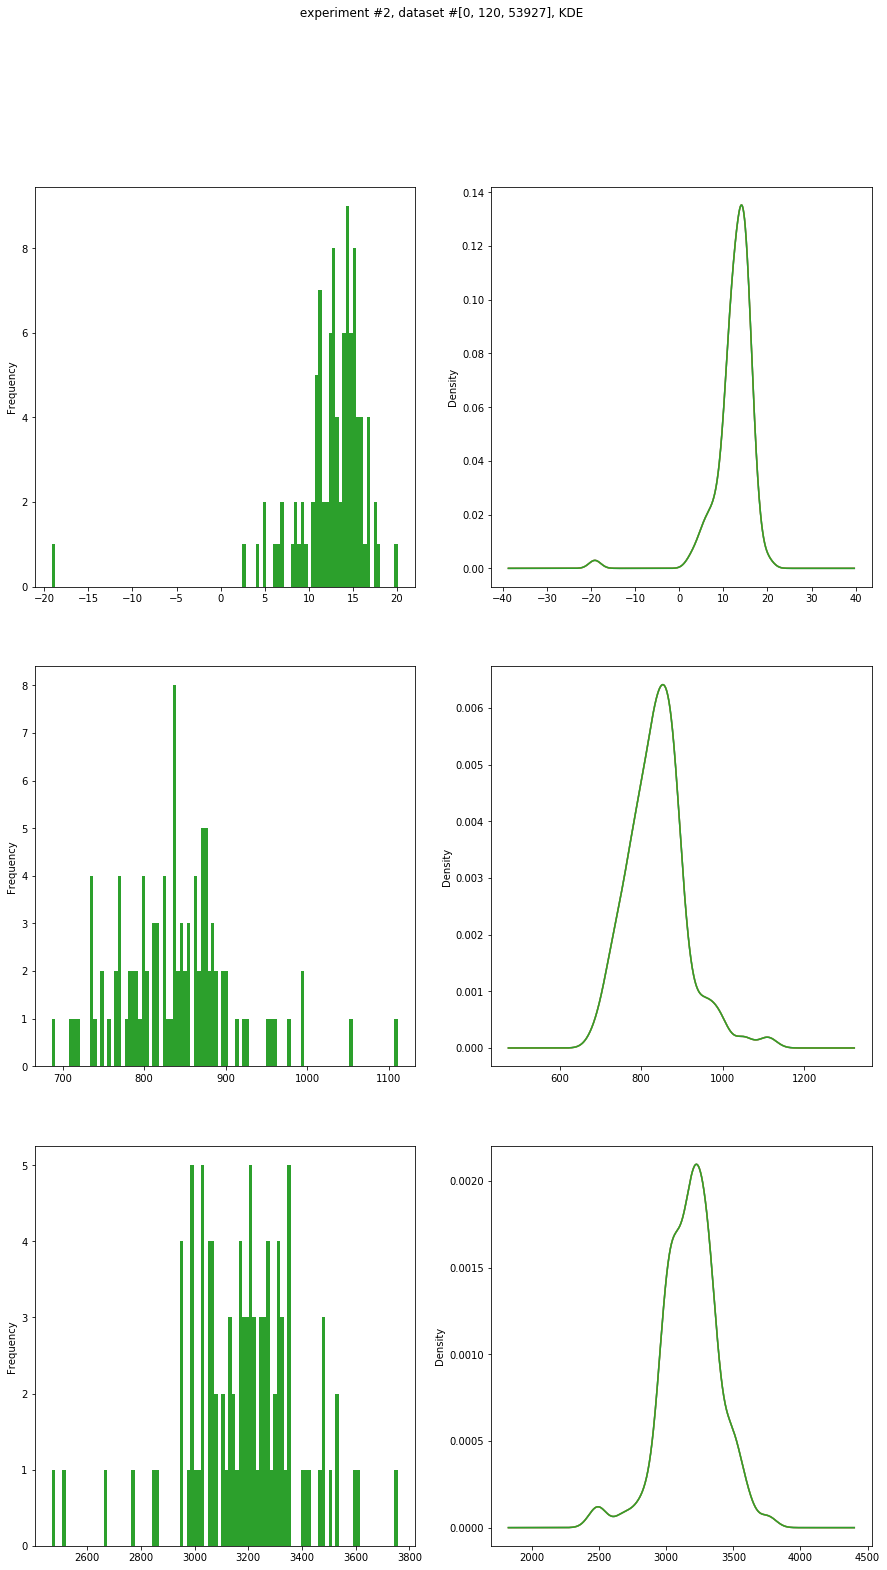

In [67]:
exp_n = 0
data_n = [0, 120, 53927]
num_shapes = 3
fig, ax1 = plt.subplots(nrows = len(data_n), ncols=2, figsize=(15,25))

for idx, data_n_el in enumerate(data_n):
    for exp_n in range(num_shapes):
        sample_forcast_list[exp_n][data_n_el].plot.hist(bins = 100, ax=ax1[idx,0])
        sample_forcast_list[exp_n][data_n_el].plot.kde(0.3, ax=ax1[idx,1])

fig.suptitle(f' experiment #{exp_n}, dataset #{data_n}, KDE')

### histogram of simples

Text(0.5, 1.0, ' experiment #4, dataset #53918, KDE')

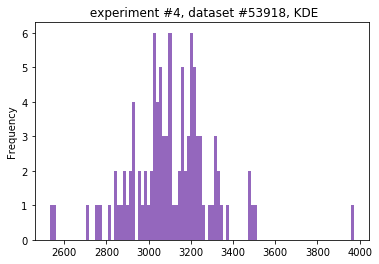

In [68]:
exp_n = 0 
data_n = 53918
for exp_n in range(5):
    sample_forcast_list[exp_n][data_n].plot.hist(bins = 100)
#     sample_forcast_list[exp_n][data_n].plot.kde()
plt.title(f' experiment #{exp_n}, dataset #{data_n}, KDE')

Calculate manually to see if the function works well

In [69]:
mean  = sample_forcast_list[0].mean()
sigma = sample_forcast_list[0].std()
forcast_distrib_dict = {'mean' : mean, 'sigma' : sigma} 
forcast_distrib_df = pd.DataFrame(forcast_distrib_dict).T
forcast_distrib_df

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
mean,12.512512,20.143100,18.553237,19.515835,18.176119,17.823040,16.032652,16.878014,17.516852,16.548617,...,3105.195734,3228.380734,3333.554799,3305.843377,3359.738856,3441.303021,3505.158153,3494.859657,3358.532505,3181.740749
sigma,4.483272,8.943163,4.893311,3.252827,2.403508,2.452305,5.373599,3.186098,4.575024,3.517587,...,200.907269,250.638764,193.436580,217.516741,288.351750,255.812849,212.201917,268.813380,281.056149,209.837046


In [70]:
forcast_distrib_df_2 = get_forcast_distrib(forcast_list)
forcast_distrib_df_2[0]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
mean,12.512512,20.143100,18.553237,19.515835,18.176119,17.823040,16.032652,16.878014,17.516852,16.548617,...,3105.195734,3228.380734,3333.554799,3305.843377,3359.738856,3441.303021,3505.158153,3494.859657,3358.532505,3181.740749
sigma,4.483272,8.943163,4.893311,3.252827,2.403508,2.452305,5.373599,3.186098,4.575024,3.517587,...,200.907269,250.638764,193.436580,217.516741,288.351750,255.812849,212.201917,268.813380,281.056149,209.837046


In [71]:
forcast_distrib_df_2[9]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
mean,12.512512,20.143100,18.553237,19.515835,18.176119,17.823040,16.032652,16.878014,17.516852,16.548617,...,3105.195734,3228.380734,3333.554799,3305.843377,3359.738856,3441.303021,3505.158153,3494.859657,3358.532505,3181.740749
sigma,4.483272,8.943163,4.893311,3.252827,2.403508,2.452305,5.373599,3.186098,4.575024,3.517587,...,200.907269,250.638764,193.436580,217.516741,288.351750,255.812849,212.201917,268.813380,281.056149,209.837046


Now I will check
1. sigma of 53927-6 of first csv file manually
2. sigma of means and sigmas in point 53927

the answer is:
1. in case of std. for 6=286.204316    for 7=250.7138772.   in case of avg. for 6=3550.682522, for 7=3379.849643
2. for mean it was: 201.9734532878



### plot of sigma over time

53752

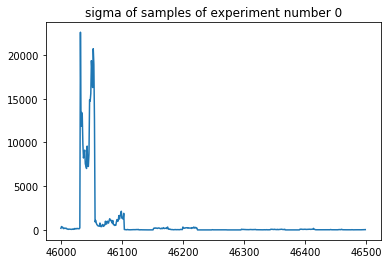

In [72]:
exp_num = 0
forcast_distrib_df_2[exp_num].loc['sigma'][46000:46500].plot()
plt.title(f'sigma of samples of experiment number {exp_num}')
forcast_distrib_df_2[exp_num].loc['sigma'].idxmax()

22594.45019173469

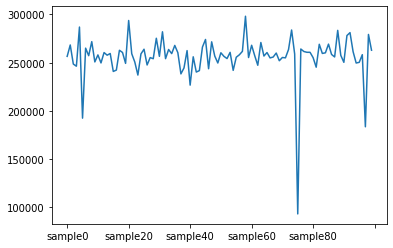

In [73]:
sample_forcast_list[0][38328+7704].plot()
forcast_distrib_df_2[exp_num].loc['sigma'][38328+7704]

My interpretation of seasonality is that since we have 321 dataset which are used to make 7*321 testsets. so we have 7 seasons

In [74]:
# convert the list of dataframes to a 3d np
forcast_np = get_np_forcast(forcast_distrib_df_2)

[ number of experiments, mean and std, number of time points ]

In [75]:
forcast_np.shape

(10, 2, 53928)

In [76]:
# get std over different experiments
forcast_std_np = get_std_np(forcast_np, forcast_distrib_df_2)

In [77]:
forcast_std_np.shape

(2, 53928)

In [78]:
# change it to pandas
df_std_forcast = pd.DataFrame(forcast_std_np)

## note about the dataset: 
cul 0 to 24 is for time series number 0
the last one is for number 320

the further we proceed, we go more and more into the future.

In [79]:
df_std_forcast.rename(index={0:'mean',1:'sigma'}, inplace=True)
df_std_forcast

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
mean,1.776357e-15,3.552714e-15,0.0,3.552714e-15,0.000000e+00,0.000000e+00,3.552714e-15,3.552714e-15,3.552714e-15,3.552714e-15,...,4.547474e-13,0.0,0.000000e+00,0.000000e+00,0.000000e+00,4.547474e-13,4.547474e-13,4.547474e-13,0.000000e+00,4.547474e-13
sigma,0.000000e+00,1.776357e-15,0.0,4.440892e-16,4.440892e-16,4.440892e-16,8.881784e-16,0.000000e+00,8.881784e-16,8.881784e-16,...,0.000000e+00,0.0,2.842171e-14,2.842171e-14,5.684342e-14,0.000000e+00,2.842171e-14,0.000000e+00,5.684342e-14,2.842171e-14


### how std of the data changes

now here is how the std is changing

Text(0.5, 1.0, 'std of std for all the datapoints')

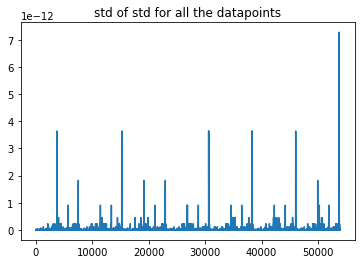

In [80]:
df_std_forcast.loc['sigma'].plot()
plt.title('std of std for all the datapoints')

Text(0.5, 1.0, 'std of mean for all the datapoints')

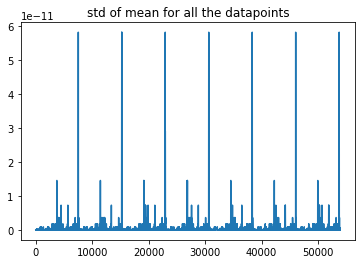

In [81]:
df_std_forcast.loc['mean'].plot()
# plt.xlim([50000, 53927])
plt.title('std of mean for all the datapoints')

plot the std of means in the spikes with target value

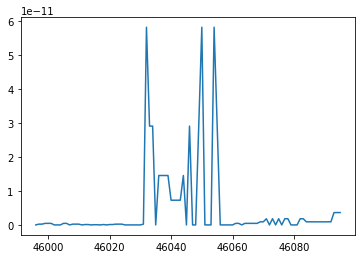

In [82]:
df_std_forcast.loc['mean'].idxmax()
df_std_forcast.loc['mean'][53700-7704:53800-7704].plot()

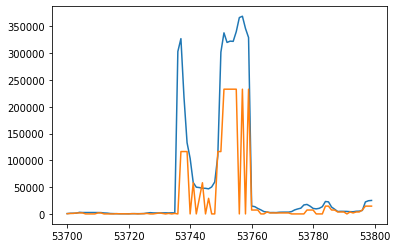

In [83]:
i = 0
target_forcast_series[(53700 - i*7704):(53800 - i*7704)].plot()
(df_std_forcast.loc['mean'][(53700 - i*7704):(53800 - i*7704)] * 4e+15).plot()

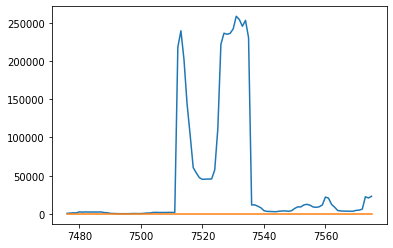

In [84]:
i = 6
target_forcast_series[(53700 - i*7704):(53800 - i*7704)].plot()
(df_std_forcast.loc['mean'][(53700 - i*7704):(53800 - i*7704)] * 10).plot()

### get the target value

In [ ]:
target_forcast_series

#### want to check if target is between mean+-sigma of the samples or not for all of the experimetns

In [ ]:
exp_num = 0
series_mean_exp = forcast_distrib_df_2[exp_num].loc['mean']
series_sigma_exp = forcast_distrib_df_2[exp_num].loc['sigma']

In [ ]:
series_sigma_exp, series_mean_exp

In [ ]:
(series_mean_exp + series_sigma_exp), (series_mean_exp - series_sigma_exp)

In [ ]:
correct_predict = ((series_mean_exp + series_sigma_exp) > target_forcast_series) & ((series_mean_exp - series_sigma_exp) < target_forcast_series)

In [ ]:
correct_predict.value_counts()

In [ ]:
def compare_predictions(target_forcast_series,forcast_distrib_df_2):
    correct_predict_list = []
    for forcast_el in forcast_distrib_df_2:
        series_mean_exp = forcast_el.loc['mean']
        series_sigma_exp = forcast_el.loc['sigma']
        correct_predict = ((series_mean_exp + series_sigma_exp) > target_forcast_series) & ((series_mean_exp - series_sigma_exp) < target_forcast_series)
        correct_predict_list.append(correct_predict)
    return correct_predict_list

In [ ]:
correct_predict_list = compare_predictions(target_forcast_series, forcast_distrib_df_2)

In [ ]:
correct_predict_list[0].value_counts()

In [ ]:
exp_num = 0
correct_predict_list[0].astype(float).plot()
plt.xlabel('data point')
plt.ylabel('is in the bound or not?')
plt.title(f'how many prediction of experiment {exp_num} is in (mean +- sigma) boundary')
plt.xlim(1000,1200)

In [ ]:
correct_predict_list[0]

In [ ]:
# try to group them based on time series, next step can be cardinality 

In [ ]:
lim = 20
for i in range(lim):
    df_std_forcast.loc['mean'][i*24:(i+1)*24].plot()
# plt.xlim([50000, 53927])
plt.title(f'std of mean of {lim} time series')
plt.xlabel('time point')
plt.ylabel('std of mean')

In [ ]:
lim = 20
df_std_forcast.loc['mean'][0:lim*24].plot()
plt.xlabel('time point')
plt.ylabel('std of mean')
# plt.xlim([50000, 53927])
plt.title(f'std of mean of {lim} time series')

# plot the predictions of the last experiment here

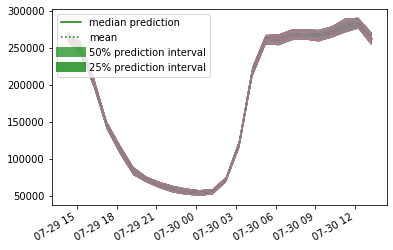

In [86]:
tmp_n = 53736
plot_forscast_same(sample_forcast_list, tmp_n)

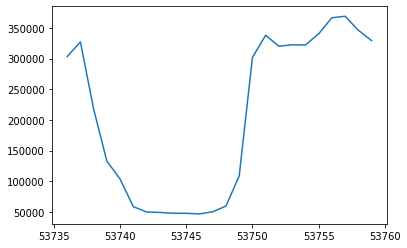

In [87]:
sample_n = 53736
target_forcast_series.iloc[sample_n : sample_n + 24].plot()

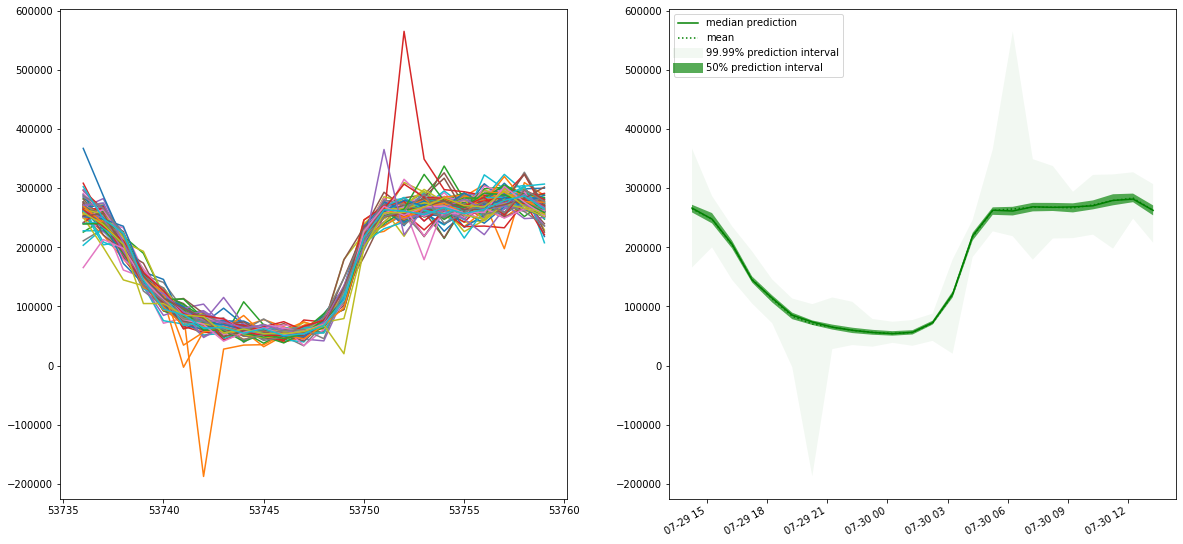

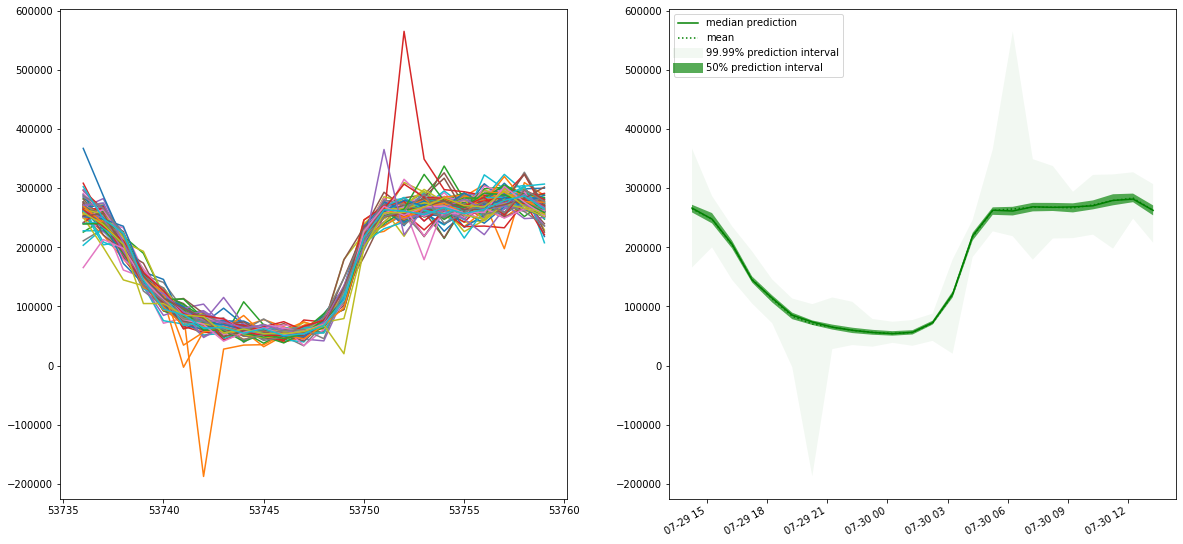

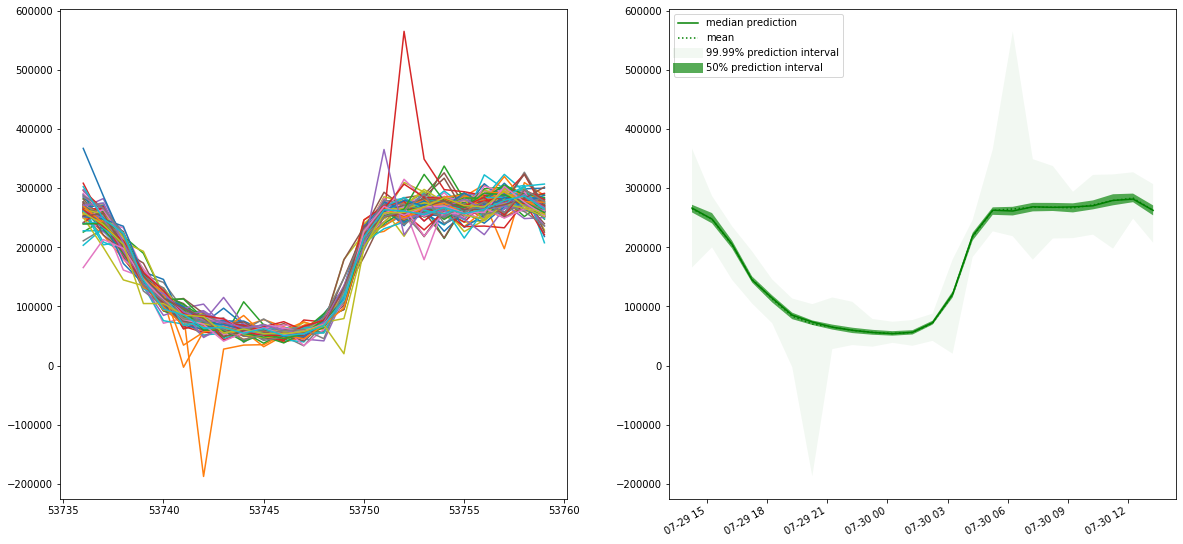

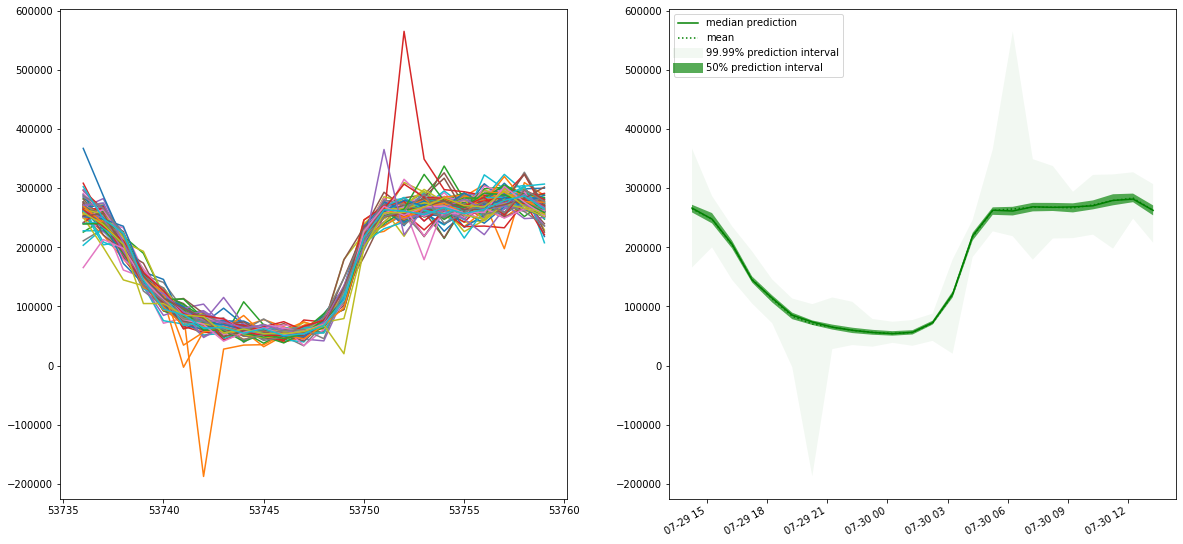

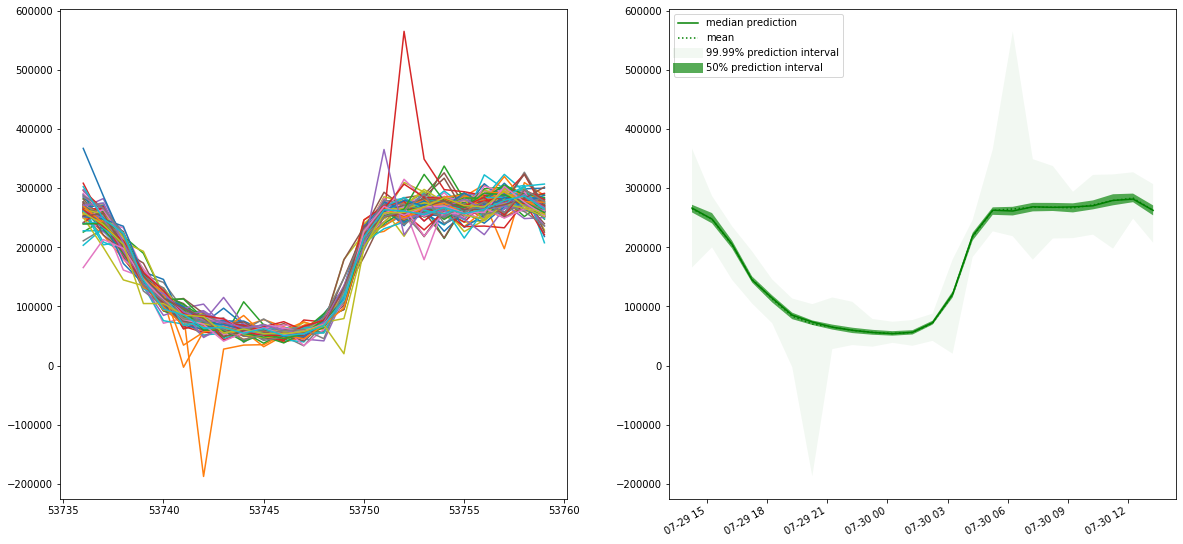

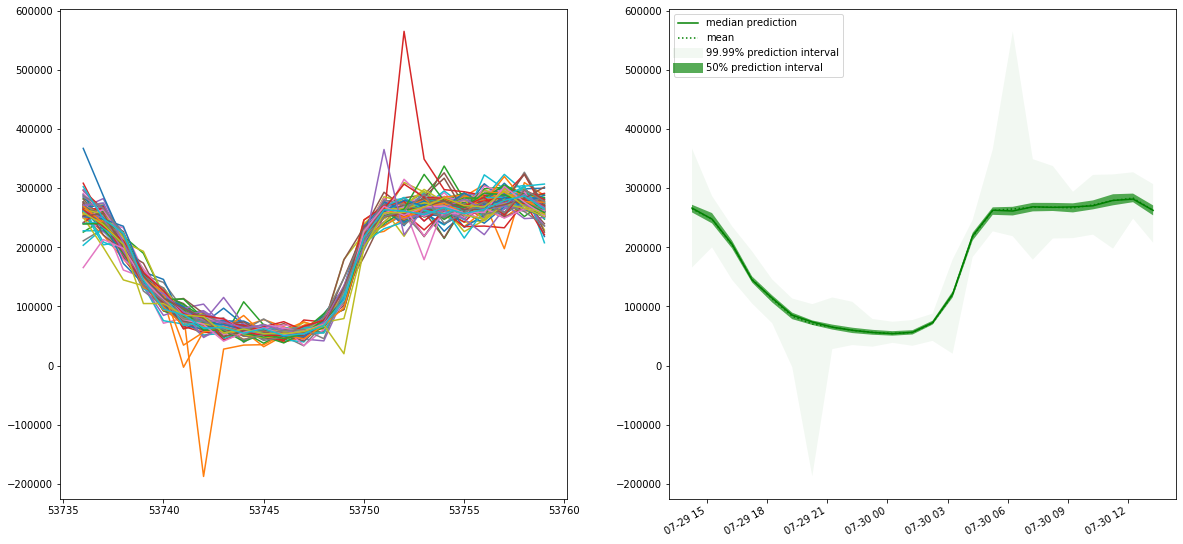

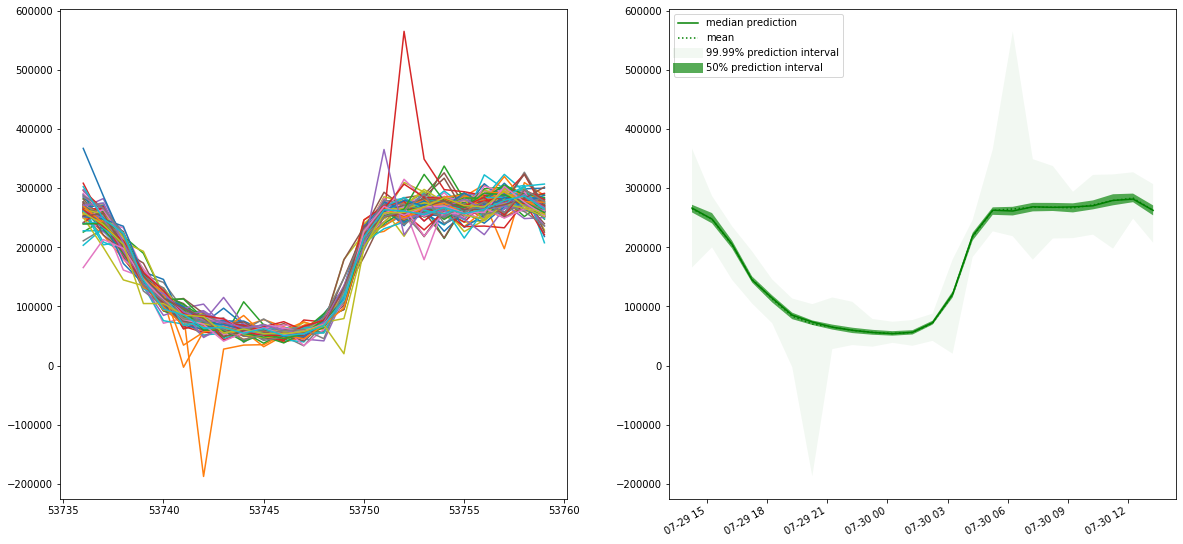

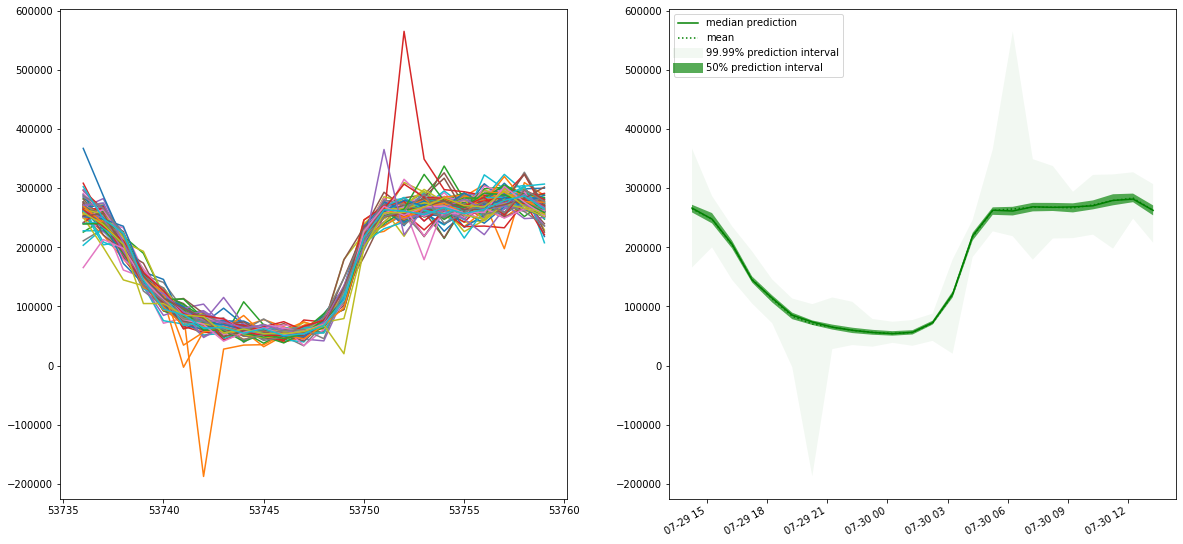

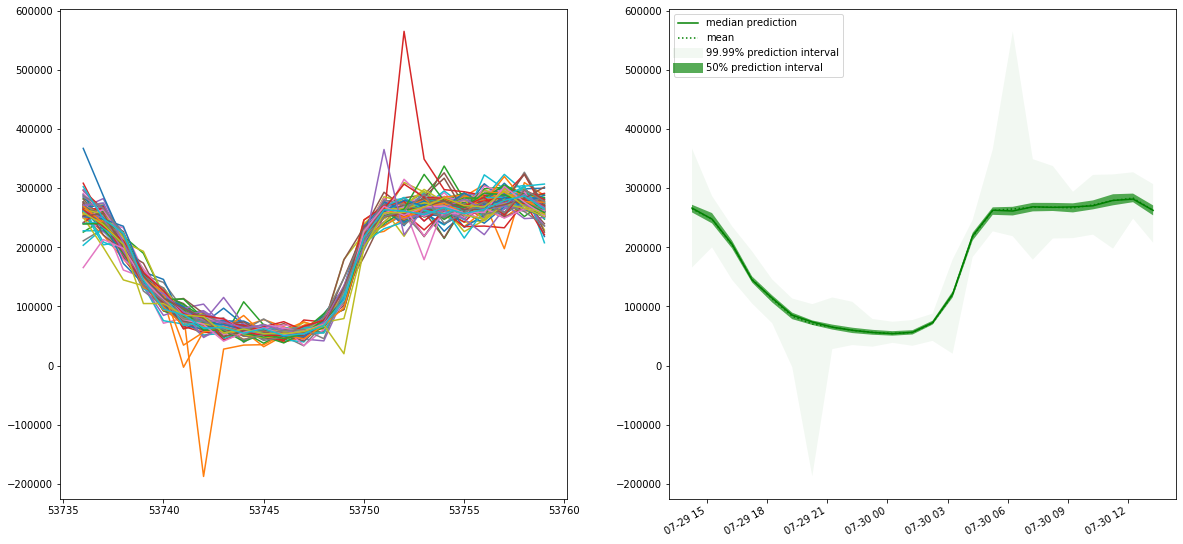

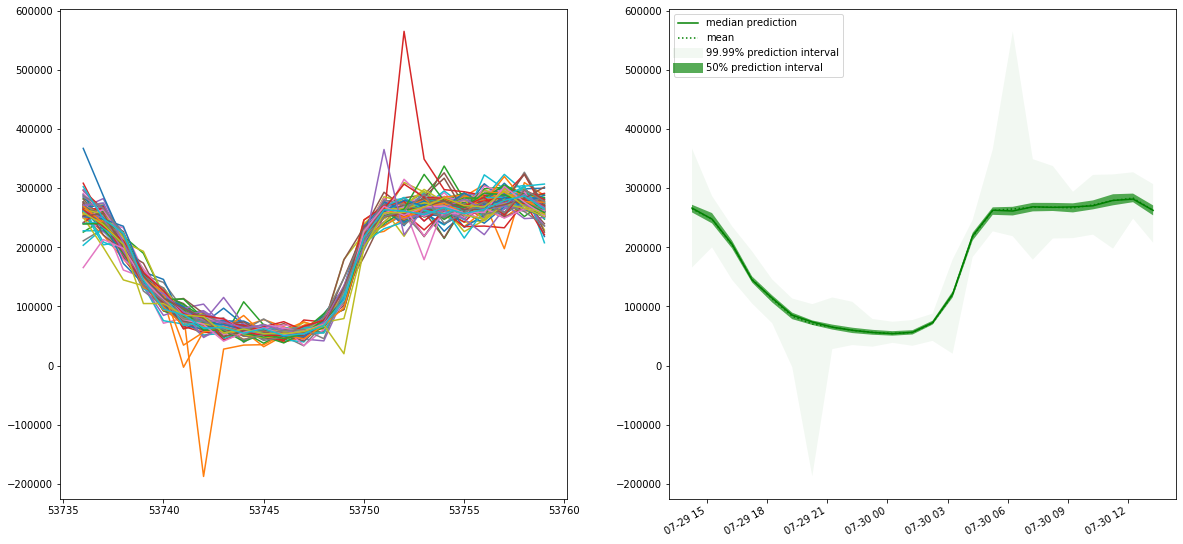

In [88]:
tmp_n = 53736
save_plot_exp(sample_forcast_list, 10, tmp_n)

### I want values between quantile 0.25 and 0.75 percent in my dataset

In [89]:
sample_forcast_list[0]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
sample0,12.237657,9.057462,14.016649,20.367722,14.021609,15.273017,16.529531,17.167347,17.578386,18.450941,...,3232.9177,3486.0308,3409.8699,3109.9940,3305.8271,3688.2866,3573.5586,3641.1272,3267.2670,3352.5935
sample1,15.133706,23.425327,16.759853,17.930445,18.277750,14.828211,12.389897,18.096832,18.743073,32.312440,...,3497.9038,3197.2420,3105.3577,3416.1663,3569.9585,3503.8990,2886.4324,3351.4126,3373.1301,2990.5764
sample2,14.737113,18.301964,16.560665,18.271822,17.327085,20.021559,18.035208,17.899162,15.686017,8.413127,...,3179.8474,3474.0857,3496.6726,3479.8574,3431.9517,3501.4240,3116.0037,3428.8770,3138.0432,2975.1140
sample3,13.273027,15.912202,17.344568,19.419256,17.908405,18.077930,16.594095,19.156208,17.926395,14.596584,...,3158.2515,3426.4668,3580.5457,3504.6370,3236.6382,3627.7126,3295.6060,2930.3630,3288.0728,3329.5366
sample4,13.009253,20.933619,28.390530,22.446486,18.593592,17.826860,15.154070,20.330729,17.217186,17.442963,...,3300.0566,2414.7834,3244.2961,3283.1190,3276.2354,3728.4917,3652.6194,3652.5598,3504.8923,2945.4395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,11.304832,16.693950,13.358883,18.024292,17.977001,16.907404,16.843964,16.697968,19.630966,17.324697,...,2813.3396,3173.7493,3183.7378,3382.1292,2966.4954,3061.8180,3729.9760,3490.0483,3294.9424,3204.4985
sample96,16.658216,22.159515,11.105467,19.984255,15.707679,15.526896,15.935336,21.613798,13.272841,11.809725,...,3041.3760,3100.3486,3038.5442,3141.5015,3178.7393,3393.8696,3577.6013,3257.5078,3357.8020,3186.5120
sample97,14.950354,15.528682,16.646180,19.284977,17.430574,16.795742,22.739985,17.000135,15.638189,15.105589,...,3043.2263,3193.1177,3546.5273,3234.1768,3353.8237,3413.3726,3898.3647,3570.3780,3393.6257,3113.1245
sample98,9.879942,18.099000,15.013381,20.002855,10.972869,15.943544,17.345331,13.645761,16.910109,17.645214,...,3158.7795,2851.2646,3367.2842,3144.4504,3368.1316,3580.2783,3499.6536,3431.4636,3249.0469,3211.3757


In [90]:
sample_forcast_list[1]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
sample0,12.237657,9.057462,14.016649,20.367722,14.021609,15.273017,16.529531,17.167347,17.578386,18.450941,...,3232.9177,3486.0308,3409.8699,3109.9940,3305.8271,3688.2866,3573.5586,3641.1272,3267.2670,3352.5935
sample1,15.133706,23.425327,16.759853,17.930445,18.277750,14.828211,12.389897,18.096832,18.743073,32.312440,...,3497.9038,3197.2420,3105.3577,3416.1663,3569.9585,3503.8990,2886.4324,3351.4126,3373.1301,2990.5764
sample2,14.737113,18.301964,16.560665,18.271822,17.327085,20.021559,18.035208,17.899162,15.686017,8.413127,...,3179.8474,3474.0857,3496.6726,3479.8574,3431.9517,3501.4240,3116.0037,3428.8770,3138.0432,2975.1140
sample3,13.273027,15.912202,17.344568,19.419256,17.908405,18.077930,16.594095,19.156208,17.926395,14.596584,...,3158.2515,3426.4668,3580.5457,3504.6370,3236.6382,3627.7126,3295.6060,2930.3630,3288.0728,3329.5366
sample4,13.009253,20.933619,28.390530,22.446486,18.593592,17.826860,15.154070,20.330729,17.217186,17.442963,...,3300.0566,2414.7834,3244.2961,3283.1190,3276.2354,3728.4917,3652.6194,3652.5598,3504.8923,2945.4395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,11.304832,16.693950,13.358883,18.024292,17.977001,16.907404,16.843964,16.697968,19.630966,17.324697,...,2813.3396,3173.7493,3183.7378,3382.1292,2966.4954,3061.8180,3729.9760,3490.0483,3294.9424,3204.4985
sample96,16.658216,22.159515,11.105467,19.984255,15.707679,15.526896,15.935336,21.613798,13.272841,11.809725,...,3041.3760,3100.3486,3038.5442,3141.5015,3178.7393,3393.8696,3577.6013,3257.5078,3357.8020,3186.5120
sample97,14.950354,15.528682,16.646180,19.284977,17.430574,16.795742,22.739985,17.000135,15.638189,15.105589,...,3043.2263,3193.1177,3546.5273,3234.1768,3353.8237,3413.3726,3898.3647,3570.3780,3393.6257,3113.1245
sample98,9.879942,18.099000,15.013381,20.002855,10.972869,15.943544,17.345331,13.645761,16.910109,17.645214,...,3158.7795,2851.2646,3367.2842,3144.4504,3368.1316,3580.2783,3499.6536,3431.4636,3249.0469,3211.3757


In [91]:
quant_list = make_50ps_interval_list(sample_forcast_list, 2)

In [92]:
quant_list[0]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
sample0,12.237657,NaN,NaN,20.367722,NaN,NaN,16.529531,17.167347,17.578386,NaN,...,NaN,NaN,3409.8699,NaN,3305.8271,NaN,3573.5586,NaN,3267.2670,NaN
sample1,NaN,NaN,16.759853,NaN,18.277750,NaN,NaN,18.096832,18.743073,NaN,...,NaN,3197.2420,NaN,3416.1663,NaN,3503.8990,NaN,NaN,3373.1301,NaN
sample2,14.737113,18.301964,16.560665,18.271822,NaN,NaN,NaN,17.899162,NaN,NaN,...,3179.8474,NaN,NaN,NaN,3431.9517,3501.4240,NaN,3428.8770,NaN,NaN
sample3,13.273027,NaN,17.344568,19.419256,17.908405,18.077930,16.594095,NaN,17.926395,NaN,...,3158.2515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3288.0728,NaN
sample4,13.009253,20.933619,NaN,NaN,18.593592,17.826860,15.154070,NaN,17.217186,17.442963,...,NaN,NaN,3244.2961,3283.1190,3276.2354,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,11.304832,16.693950,NaN,18.024292,17.977001,16.907404,16.843964,16.697968,19.630966,17.324697,...,NaN,3173.7493,NaN,3382.1292,NaN,NaN,NaN,3490.0483,3294.9424,3204.4985
sample96,NaN,22.159515,NaN,19.984255,NaN,NaN,15.935336,NaN,NaN,NaN,...,3041.3760,NaN,NaN,NaN,NaN,3393.8696,3577.6013,NaN,3357.8020,3186.5120
sample97,14.950354,NaN,16.646180,19.284977,17.430574,16.795742,NaN,17.000135,NaN,15.105589,...,3043.2263,3193.1177,NaN,3234.1768,3353.8237,3413.3726,NaN,3570.3780,3393.6257,3113.1245
sample98,NaN,18.099000,NaN,20.002855,NaN,NaN,17.345331,NaN,16.910109,17.645214,...,3158.7795,NaN,3367.2842,NaN,3368.1316,NaN,3499.6536,3431.4636,NaN,3211.3757


In [93]:
distb = get_forcast_distrib_sample(quant_list)
distb[1]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
mean,13.266462,19.910545,18.211302,19.451543,18.355782,17.839239,16.367767,16.838365,17.898689,16.548653,...,3109.374948,3240.625026,3332.961760,3295.340128,3357.582702,3440.514226,3518.933786,3500.663820,3372.113310,3186.451836
sigma,1.125295,1.824779,1.703866,0.831263,0.604768,0.863041,0.990351,0.957874,0.944545,0.866173,...,64.812160,78.342191,69.408168,66.930288,53.775374,63.614753,75.638738,85.622712,59.947446,73.891299


In [95]:
# convert the list of dataframes to a 3d np
forcast_np_quant = get_np_forcast(distb)
forcast_np_quant.shape

(2, 2, 53928)

In [96]:
# get std over different experiments
forcast_std_np = get_std_np(forcast_np_quant, distb)
forcast_std_pd = pd.DataFrame(forcast_std_np)
forcast_std_pd

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


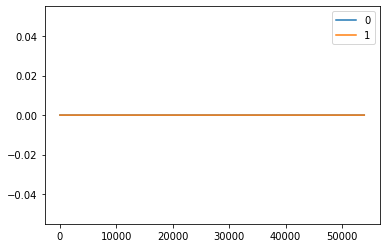

In [97]:
forcast_std_pd.T.plot()

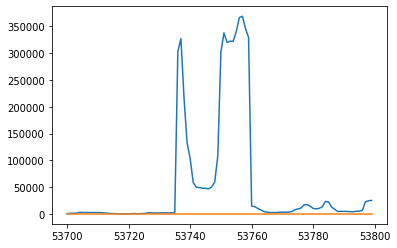

In [98]:
i = 0
target_forcast_series[(53700 - i*7704):(53800 - i*7704)].plot()
(forcast_std_pd.loc[0][(53700 - i*7704):(53800 - i*7704)] * 100).plot()

### non_modular

In [99]:
# dataframe

my_df = sample_forcast_list[0]
q1 = my_df.quantile(0.25)
q2 = my_df.quantile(0.75)

mask = (my_df < q2) & (q1 < my_df)
my_df=my_df[mask]
my_df

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
sample0,12.237657,NaN,NaN,20.367722,NaN,NaN,16.529531,17.167347,17.578386,NaN,...,NaN,NaN,3409.8699,NaN,3305.8271,NaN,3573.5586,NaN,3267.2670,NaN
sample1,NaN,NaN,16.759853,NaN,18.277750,NaN,NaN,18.096832,18.743073,NaN,...,NaN,3197.2420,NaN,3416.1663,NaN,3503.8990,NaN,NaN,3373.1301,NaN
sample2,14.737113,18.301964,16.560665,18.271822,NaN,NaN,NaN,17.899162,NaN,NaN,...,3179.8474,NaN,NaN,NaN,3431.9517,3501.4240,NaN,3428.8770,NaN,NaN
sample3,13.273027,NaN,17.344568,19.419256,17.908405,18.077930,16.594095,NaN,17.926395,NaN,...,3158.2515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3288.0728,NaN
sample4,13.009253,20.933619,NaN,NaN,18.593592,17.826860,15.154070,NaN,17.217186,17.442963,...,NaN,NaN,3244.2961,3283.1190,3276.2354,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,11.304832,16.693950,NaN,18.024292,17.977001,16.907404,16.843964,16.697968,19.630966,17.324697,...,NaN,3173.7493,NaN,3382.1292,NaN,NaN,NaN,3490.0483,3294.9424,3204.4985
sample96,NaN,22.159515,NaN,19.984255,NaN,NaN,15.935336,NaN,NaN,NaN,...,3041.3760,NaN,NaN,NaN,NaN,3393.8696,3577.6013,NaN,3357.8020,3186.5120
sample97,14.950354,NaN,16.646180,19.284977,17.430574,16.795742,NaN,17.000135,NaN,15.105589,...,3043.2263,3193.1177,NaN,3234.1768,3353.8237,3413.3726,NaN,3570.3780,3393.6257,3113.1245
sample98,NaN,18.099000,NaN,20.002855,NaN,NaN,17.345331,NaN,16.910109,17.645214,...,3158.7795,NaN,3367.2842,NaN,3368.1316,NaN,3499.6536,3431.4636,NaN,3211.3757


In [100]:
my_df_func = make_50ps_intervals(sample_forcast_list[0])
my_df_func

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
sample0,12.237657,NaN,NaN,20.367722,NaN,NaN,16.529531,17.167347,17.578386,NaN,...,NaN,NaN,3409.8699,NaN,3305.8271,NaN,3573.5586,NaN,3267.2670,NaN
sample1,NaN,NaN,16.759853,NaN,18.277750,NaN,NaN,18.096832,18.743073,NaN,...,NaN,3197.2420,NaN,3416.1663,NaN,3503.8990,NaN,NaN,3373.1301,NaN
sample2,14.737113,18.301964,16.560665,18.271822,NaN,NaN,NaN,17.899162,NaN,NaN,...,3179.8474,NaN,NaN,NaN,3431.9517,3501.4240,NaN,3428.8770,NaN,NaN
sample3,13.273027,NaN,17.344568,19.419256,17.908405,18.077930,16.594095,NaN,17.926395,NaN,...,3158.2515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3288.0728,NaN
sample4,13.009253,20.933619,NaN,NaN,18.593592,17.826860,15.154070,NaN,17.217186,17.442963,...,NaN,NaN,3244.2961,3283.1190,3276.2354,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample95,11.304832,16.693950,NaN,18.024292,17.977001,16.907404,16.843964,16.697968,19.630966,17.324697,...,NaN,3173.7493,NaN,3382.1292,NaN,NaN,NaN,3490.0483,3294.9424,3204.4985
sample96,NaN,22.159515,NaN,19.984255,NaN,NaN,15.935336,NaN,NaN,NaN,...,3041.3760,NaN,NaN,NaN,NaN,3393.8696,3577.6013,NaN,3357.8020,3186.5120
sample97,14.950354,NaN,16.646180,19.284977,17.430574,16.795742,NaN,17.000135,NaN,15.105589,...,3043.2263,3193.1177,NaN,3234.1768,3353.8237,3413.3726,NaN,3570.3780,3393.6257,3113.1245
sample98,NaN,18.099000,NaN,20.002855,NaN,NaN,17.345331,NaN,16.910109,17.645214,...,3158.7795,NaN,3367.2842,NaN,3368.1316,NaN,3499.6536,3431.4636,NaN,3211.3757


In [101]:
# my_df1 = sample_forcast_list[1]
# q11 = my_df1.quantile(0.25)
# q21 = my_df1.quantile(0.75)

# mask1 = (my_df1 < q21) & (q11 < my_df1)
# my_df1=my_df1[mask1]
# my_df1
my_df1 = make_50ps_intervals(sample_forcast_list[1])

In [102]:
mask = my_df1.std() == my_df.std()


my_df1.std().idxmax(), mask.value_counts()

(53757, True    53928
 dtype: int64)

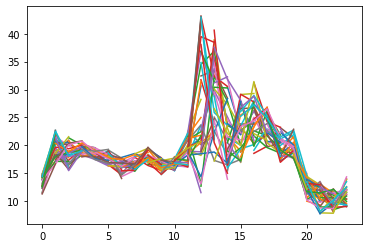

In [103]:
# took more than 10 mins 
sample_n = 0
my_df1.iloc[:, sample_n : sample_n + 24].T.plot(legend=False)

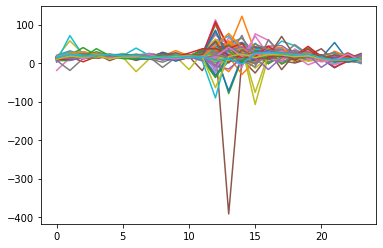

In [104]:
sample_forcast_list[1].iloc[:, sample_n : sample_n + 24].T.plot(legend=False)

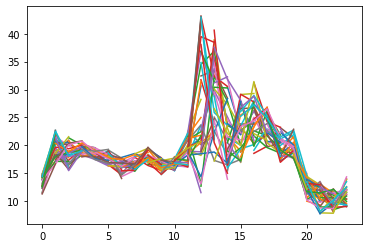

In [105]:
my_df.iloc[:, sample_n : sample_n + 24].T.plot(legend=False)

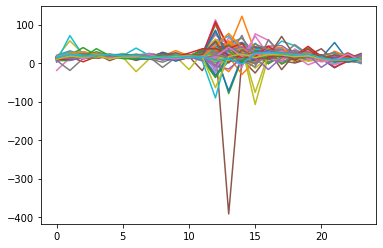

In [106]:
sample_forcast_list[0].iloc[:, sample_n : sample_n + 24].T.plot(legend=False)

In [107]:
# add all of them to the 50percents 
# TODO: "my_df_list" should be all of the samples not just one
my_df_list = [my_df, my_df1]
distb = get_forcast_distrib_sample(my_df_list)
distb[1]

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
mean,13.266462,19.910545,18.211302,19.451543,18.355782,17.839239,16.367767,16.838365,17.898689,16.548653,...,3109.374948,3240.625026,3332.961760,3295.340128,3357.582702,3440.514226,3518.933786,3500.663820,3372.113310,3186.451836
sigma,1.125295,1.824779,1.703866,0.831263,0.604768,0.863041,0.990351,0.957874,0.944545,0.866173,...,64.812160,78.342191,69.408168,66.930288,53.775374,63.614753,75.638738,85.622712,59.947446,73.891299


In [108]:
# convert the list of dataframes to a 3d np
forcast_np_quant = get_np_forcast(distb)
forcast_np_quant.shape

(2, 2, 53928)

In [109]:
# get std over different experiments
forcast_std_np = get_std_np(forcast_np_quant, distb)
forcast_std_pd = pd.DataFrame(forcast_std_np)

In [110]:
forcast_std_pd

,0,1,2,3,4,5,6,7,8,9,...,53918,53919,53920,53921,53922,53923,53924,53925,53926,53927
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KS test

In [111]:
from scipy import stats
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 300  # size of second sample

In [112]:
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
rvs3 = stats.norm.rvs(size=n2, loc=0.01, scale=1.0)
stats.ks_2samp(rvs1, rvs1)

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [113]:
exp_n = 5
data_n_el = 4
smpl0 = sample_forcast_list[exp_n][data_n_el]

exp_n = 6
smpl2 = sample_forcast_list[exp_n][data_n_el]

exp_n = 0
smpl3 = sample_forcast_list[exp_n][data_n_el]

# stats.ks_2samp(smpl1, smpl1)
# smpl1 = smpl1.to_numpy()
# smpl2 = smpl2.to_numpy()

In [114]:
stats.ks_2samp(smpl2, smpl0)

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [115]:
stats.ks_2samp(smpl2, smpl3)

Ks_2sampResult(statistic=0.0, pvalue=1.0)

In [116]:
res = stats.ks_2samp(rvs1, smpl0)
res.pvalue

2.4836996449564004e-58

### as it is possible smpl 0 and 2 are not for the same distribution, however 2 and 3 are

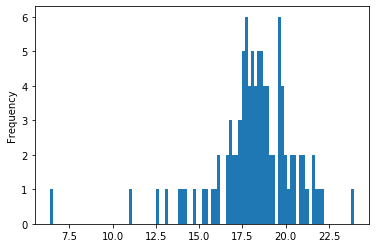

In [117]:
smpl2.plot.hist(bins = 100)

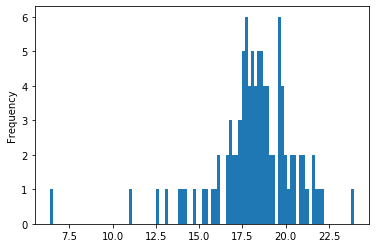

In [118]:
smpl3.plot.hist(bins = 100)

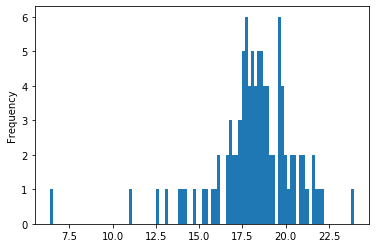

In [119]:
smpl0.plot.hist(bins = 100)

In [120]:
### TODO: get the table of ks test
### get only from 25 tp 75 (50% interval)

## Get pvalue and statistic of ks test for all of the time points in all of the experiments
them we can use this table as a mask for evaluation

In [121]:
exp_lim = 10
# timepoint_lim = 53928 for now I will chekc only 100 first timepoints
timepoint_lim = 100

# initialze the tables with 0
ks_statistic_table = np.zeros((timepoint_lim, exp_lim, exp_lim))
ks_pvalue_table = np.zeros((timepoint_lim, exp_lim, exp_lim))



# for all the experiments,
for timepoint_el in tqdm(range(timepoint_lim)):
    for exp_n in range(exp_lim):
        for idx in range(exp_n,exp_lim):
            smpl1 = sample_forcast_list[exp_n][timepoint_el]
            smpl2 = sample_forcast_list[idx][timepoint_el]
            res = stats.ks_2samp(smpl1, smpl2)
            ks_statistic_table[timepoint_el,exp_n,idx] = res.statistic
            ks_pvalue_table[timepoint_el,exp_n,idx] = res.pvalue
        
pd.DataFrame(ks_pvalue_table[4]) > 0.05

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 168.80it/s]


,0,1,2,3,4,5,6,7,8,9
0,True,True,True,True,True,True,True,True,True,True
1,False,True,True,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True
5,False,False,False,False,False,True,True,True,True,True
6,False,False,False,False,False,False,True,True,True,True
7,False,False,False,False,False,False,False,True,True,True
8,False,False,False,False,False,False,False,False,True,True
9,False,False,False,False,False,False,False,False,False,True


In [122]:
def kss_test(sample_forcast_list, exp_lim, timepoint_lim):
    # initialze the tables with 0
    ks_statistic_table = np.zeros((timepoint_lim, exp_lim, exp_lim))
    ks_pvalue_table = np.zeros((timepoint_lim, exp_lim, exp_lim))
    
    # for all the timepoints
    for timepoint_el in tqdm(range(timepoint_lim)):
        # for all the experiments,
        for exp_n in range(exp_lim):
            for idx in range(exp_n,exp_lim):
                smpl1 = sample_forcast_list[exp_n][timepoint_el]
                smpl2 = sample_forcast_list[idx][timepoint_el]
                res = stats.ks_2samp(smpl1, smpl2)
                ks_statistic_table[timepoint_el,exp_n,idx] = res.statistic
                ks_pvalue_table[timepoint_el,exp_n,idx] = res.pvalue
    
    return ks_statistic_table, ks_pvalue_table

In [123]:
exp_lim = 10
# timepoint_lim = 53928 for now I will chekc only 100 first timepoints
timepoint_lim = 100

ks_stat, ks_pval = kss_test(sample_forcast_list, exp_lim, timepoint_el)
pd.DataFrame(ks_pval[0])

100%|█████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 186.94it/s]


,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
